<a href="https://colab.research.google.com/github/MauricioCastroF/VC_Ejercicios/blob/main/VC1_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I.git
!cd vision_computadora_I && git checkout 8va-cohorte

Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 488, done.
remote: Total 488 (delta 0), reused 0 (delta 0), pack-reused 488
Receiving objects: 100% (488/488), 148.29 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (154/154), done.
Branch '8va-cohorte' set up to track remote branch '8va-cohorte' from 'origin'.
Switched to a new branch '8va-cohorte'


In [18]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [4]:
cd vision_computadora_I

/content/vision_computadora_I


In [6]:
cd Codigo

/content/vision_computadora_I/Codigo


In [8]:
cd Clase1

/content/vision_computadora_I/Codigo/Clase1


In [22]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('imgBloque1.bmp', cv.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (480, 640) pix
[[ 62  62  61 ... 255 222 176]
 [ 62  62  61 ... 255 222 176]
 [ 61  61  60 ... 255 219 173]
 ...
 [ 68  68  69 ... 100 101 102]
 [ 67  67  67 ... 103 103 102]
 [ 66  66  66 ... 108 105 103]]


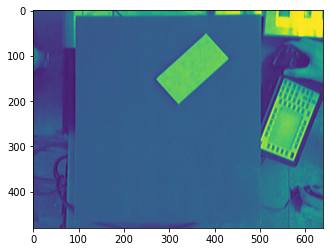

In [23]:
# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

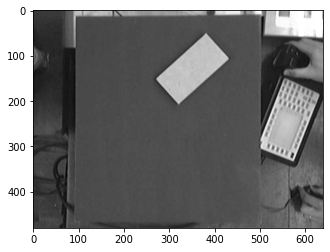

In [24]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# **¿Qué pasa al cambiar el valor máx y mín?**

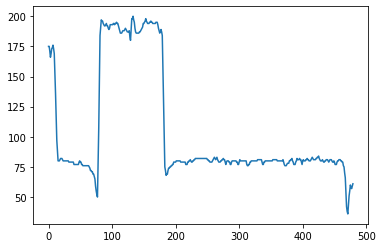

In [25]:
perfil = img[:,350];
plt.plot(perfil)
plt.show()

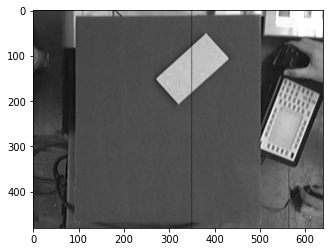

In [26]:
# Ahora hagamos una marca en la imagen para indicar la línea que usamos para tomar el perfil
img_anotada = img.copy()
img_anotada[:, 350]=0
plt.figure()
plt.imshow(img_anotada,cmap='gray')
plt.show()

Mostrando con interpolacion nearest


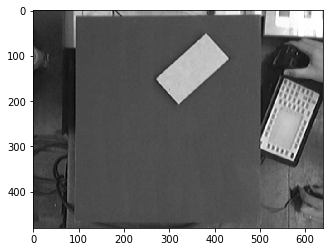

Mostrando con interpolacion bilinear


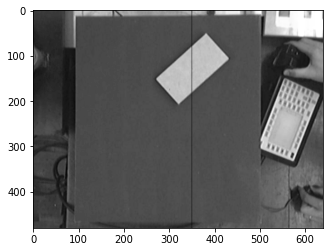

Mostrando con interpolacion bicubic


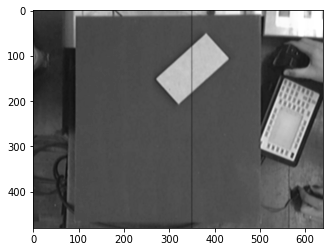

In [27]:
# Matplotlib realiza una interpolacion de pixeles vecinos para visualizar imagenes por fuera de su resolucion original
img_anotada = img.copy()
img_anotada[:,350]=0
for interp in ['nearest','bilinear','bicubic']:
    print('Mostrando con interpolacion {}'.format(interp))
    plt.figure()
    plt.imshow(img_anotada,cmap='gray',interpolation=interp)
    plt.show()

Tamaño imagen: (480, 640, 3)


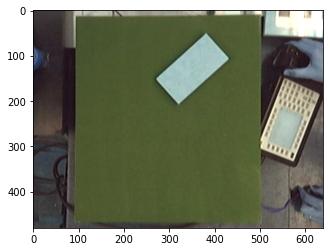

In [28]:
# Ahora quiero verla como imagen en color
img_color = cv.imread('imgBloque1.bmp')
# Dimensión de la imagen
print(f'Tamaño imagen: {img_color.shape}')
# Muestro la imagen color
plt.imshow(img_color)
plt.show()

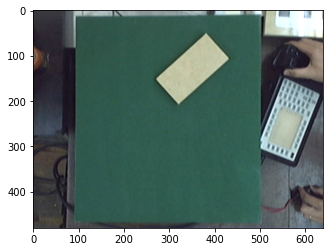

In [29]:
# Parece que tengo problemas con la paleta de colores 
# Paso la imagen de BRG a RGB
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

# **Una forma sencilla de invertir el orden de los canales utilizando Numpy**

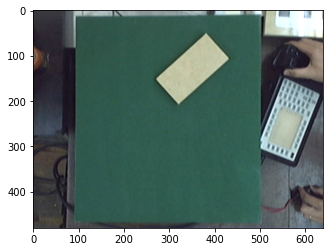

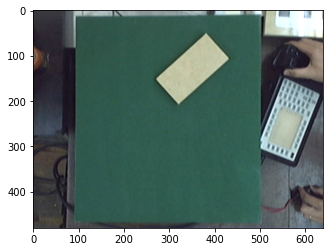

In [31]:
# Respuesta
imgRGB = img_color[:, :, ::-1]
plt.imshow(imgRGB)
plt.show()

# Otra 
imgRGB = img_color[..., ::-1]
plt.imshow(imgRGB)
plt.show()

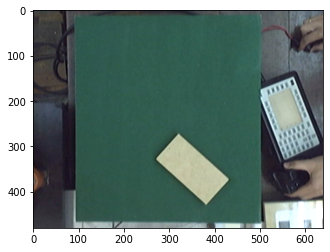

In [32]:
imgRGB_inv = img_color[::-1, :, ::-1]
plt.imshow(imgRGB_inv)
plt.show()

[[ 62  62  61 ... 255 218 172]
 [ 62  62  61 ... 255 218 172]
 [ 61  61  60 ... 255 215 169]
 ...
 [ 68  68  69 ...  90  91  92]
 [ 67  67  67 ...  92  93  92]
 [ 66  66  66 ...  97  95  93]]
Canal rojo


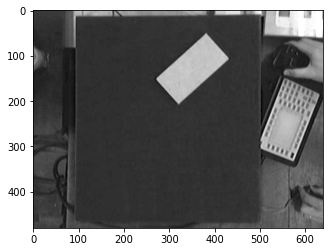

Canal verde


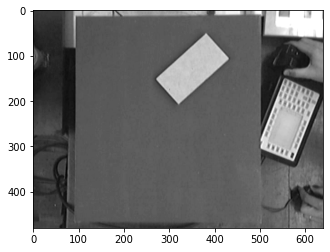

Canal azul


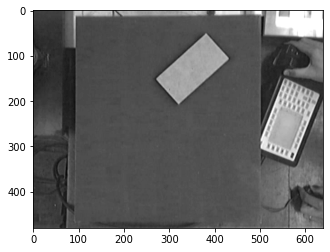

In [33]:
# Quiero desensamblar los canales para trabajarlos por separado

im_r, im_g, im_b = cv.split(imgRGB)
print(im_r)
print('Canal rojo')
plt.imshow(im_r, cmap='gray')
plt.show()
print('Canal verde')
plt.imshow(im_g, cmap='gray')
plt.show()
print('Canal azul')
plt.imshow(im_b, cmap='gray')
plt.show()

# **¿Qué canales me dan mayor discriminación?**

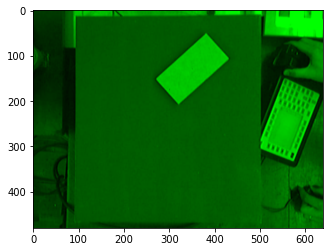

In [40]:
# Vamos a eliminar un plano y reconstruimos la imagen
imgRGB2 = cv.merge((im_r*0, im_g, im_b * 0))

plt.imshow(imgRGB2)
plt.show()
#  Qué combinación de canales me da la mayor discriminación ??

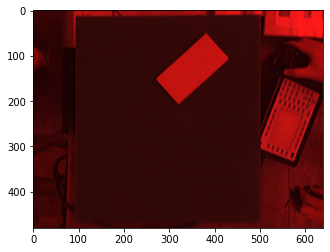

In [50]:
# Vamos a componer la imagen color con distintos pesos en los canales
# Notar el uso de uint8 !!
imgRGB2 = cv.merge((im_r, np.uint8(im_g*0.1), np.uint8(im_b*0.1)))
plt.imshow(imgRGB2)
plt.show()

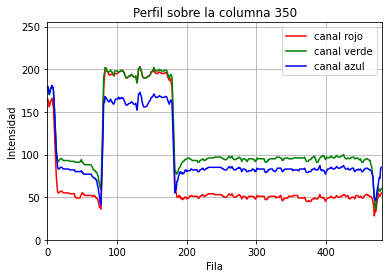

In [51]:
idx_col = 350
perfil_color = imgRGB[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal rojo')
plt.plot(perfil_color[:,1], color='g', label='canal verde')
plt.plot(perfil_color[:,2], color='b', label='canal azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 480)
plt.ylim(0, 255)
plt.legend()
plt.show()

In [52]:
# Guardamos la imagen modificada
# Verificar cómo quedaron los colores y tratar de explicar qué pasó
cv.imwrite('modificada.png', imgRGB2)

True